In [60]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout , Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

In [83]:
def load_data(name , label):

    feature = pickle.load(open(name,'rb'))
    label   = pickle.load(open(label,'rb'))

    # print(feature.shape)
    # print(label.shape)

    return feature , label


def split_data(X,y):
    X_train , X_test , y_train , y_test = train_test_split(np.array(X) , np.array(y) , test_size=0.2)
    return X_train , X_test , y_train , y_test

def recale(X_train , X_test):
    return X_train / 255 , X_test / 255

def extract_class(y_train):
    return len(np.unique(y_train))

def extract_inputshape(X_train):
    return X_train.shape[1:]

def create_model(in_shape , num_classes):

    model = Sequential()
    model.add(Input(shape=(in_shape)))

    model.add(Conv2D(32, (3,3) , activation='relu' , padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    

    model.add(Conv2D(64, (3,3) , activation='relu',padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))


    model.add(Flatten())

    model.add(Dense(512 ,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1 , activation='sigmoid'))
#     model.add(Dense(num_classes , activation='softmax'))

    return model

def train_model(model ,X_train,y_train, input_epochs , input_batch_size , input_validation_split):
    
#     opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    Er = EarlyStopping(patience=5 , restore_best_weights=True)


    history = model.fit(X_train, y_train, batch_size=input_batch_size,
                        epochs=input_epochs,
                        verbose=1,
                        validation_split=input_validation_split,
                        callbacks=[Er])
    return history

def evaluate_model(X_test , y_test):
    loss , score = model.evaluate(X_test , y_test)
    print('Loss:',loss)
    print('Score:',score)


def visulize_confusion(model , X_test):
    y_pred = np.where(model.predict(X_test) >0.5 , 1,0)
#     y_pred = np.argmax(model.predict(X_test) , axis=1)
    cm = confusion_matrix(y_test , y_pred)
    ConfusionMatrixDisplay(cm ).plot()
    plt.show()

def visulize_label(y_train):
    x , y = np.unique(y_train , return_counts=True)
    sns.barplot(x=x,y=y)
    plt.title('Label')
    plt.show()

def visual_graph(history):

    plt.figure(figsize=(12,5.5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],color='b',label='Training')
    plt.plot(history.history['val_loss'],color='r',label='val_Training')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],color='b',label='Training')
    plt.plot(history.history['val_accuracy'],color='r',label='val_Training')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()
    return

In [75]:
X , y = load_data('feature.pickle' , 'label.pickle')
X_train , X_test , y_train , y_test = split_data(X,y)
X_train , X_test = recale(X_train , X_test)
num_class = extract_class(y_train)
in_shape = extract_inputshape(X_train)
model = create_model(in_shape,num_class)
model.summary()

In [73]:
history = train_model(model , X_train , y_train , 100 , 64 , 0.1 )
evaluate_model(X_test , y_test)


Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 50s 174ms/step - accuracy: 0.5281 - loss: 0.7791 - val_accuracy: 0.6590 - val_loss: 0.6322
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 59s 207ms/step - accuracy: 0.6683 - loss: 0.6072 - val_accuracy: 0.7260 - val_loss: 0.5460
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.7391 - loss: 0.5299 - val_accuracy: 0.7600 - val_loss: 0.5009
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 53s 189ms/step - accuracy: 0.7690 - loss: 0.4841 - val_accuracy: 0.7680 - val_loss: 0.4854
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 54s 190ms/step - accuracy: 0.7879 - loss: 0.4539 - val_accuracy: 0.7730 - val_loss: 0.4598
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.8110 - loss: 0.4034 - val_accuracy: 0.7905 - val_loss: 0.4560
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.8383 - loss: 0.3651 - val_accuracy: 0.7850 - val_loss: 0.4637
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 195ms/step - accuracy: 0.8489 -

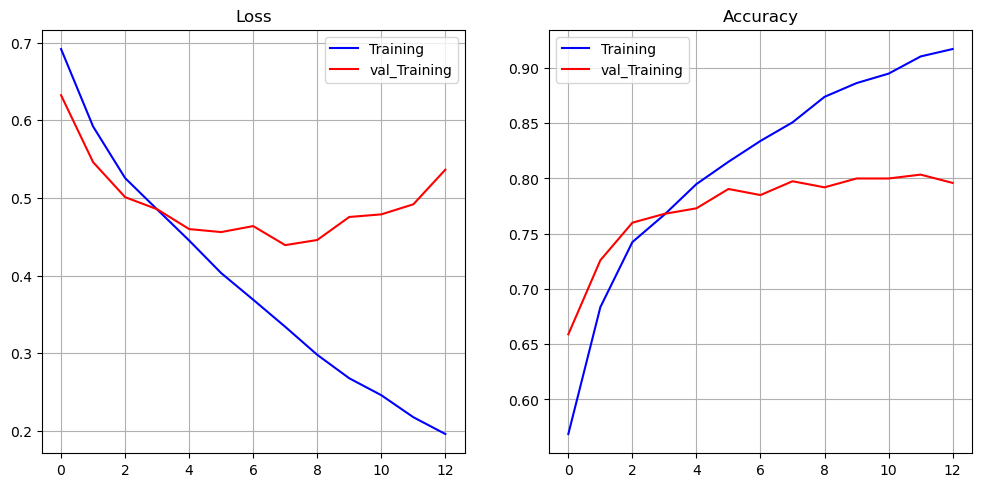

In [74]:
visual_graph(history)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


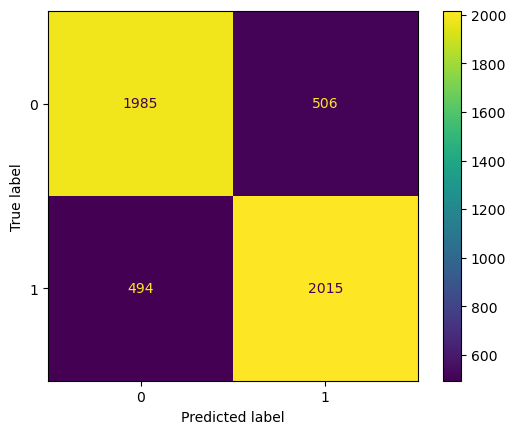

In [84]:
y_pred = np.where(model.predict(X_test) > 0.5 ,1,0)

confusion_matrix(y_test , y_pred)
visulize_confusion(model ,X_test)